In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import LabelEncoder
import random
import cv2

In [ ]:
path='/content/drive/MyDrive/breast cancer detection/all-mias'

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/breast cancer detection/all-mias/Info.txt",sep=" ")
data

,REFNUM,BG,CLASS,SEVERITY,X,Y,RADIUS,Unnamed: 7
0,mdb001,G,CIRC,B,535.0,425.0,197.0,NaN
1,mdb002,G,CIRC,B,522.0,280.0,69.0,NaN
2,mdb003,D,NORM,NaN,NaN,NaN,NaN,NaN
3,mdb004,D,NORM,NaN,NaN,NaN,NaN,NaN
4,mdb005,F,CIRC,B,477.0,133.0,30.0,NaN
...,...,...,...,...,...,...,...,...
325,mdb318,D,NORM,NaN,NaN,NaN,NaN,NaN
326,mdb319,D,NORM,NaN,NaN,NaN,NaN,NaN
327,mdb320,D,NORM,NaN,NaN,NaN,NaN,NaN
328,mdb321,D,NORM,NaN,NaN,NaN,NaN,NaN


In [ ]:
data=data.drop('Unnamed: 7',axis=1)

In [ ]:
data.isnull().sum()

REFNUM        0
BG            0
CLASS         0
SEVERITY    207
X           211
Y           211
RADIUS      211
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   REFNUM    330 non-null    object 
 1   BG        330 non-null    object 
 2   CLASS     330 non-null    object 
 3   SEVERITY  123 non-null    object 
 4   X         119 non-null    float64
 5   Y         119 non-null    float64
 6   RADIUS    119 non-null    float64
dtypes: float64(3), object(4)
memory usage: 18.2+ KB


In [ ]:
knn=KNNImputer(missing_values=np.nan,n_neighbors= 5)
data[['X']]=knn.fit_transform(data[['X']])
data[['Y']]=knn.fit_transform(data[['Y']])
data[['RADIUS']]=knn.fit_transform(data[['RADIUS']])

In [ ]:
imputer=SimpleImputer(missing_values= np.nan,strategy='most_frequent')
data[['SEVERITY']]=imputer.fit_transform(data[['SEVERITY']])

In [ ]:
data.isnull().sum()

REFNUM      0
BG          0
CLASS       0
SEVERITY    0
X           0
Y           0
RADIUS      0
dtype: int64

In [ ]:
'''encode=LabelEncoder()
data['REFNUM']=encode.fit_transform(data['REFNUM'])
data['BG']=encode.fit_transform(data['BG'])
data['CLASS']=encode.fit_transform(data['CLASS'])
data['SEVERITY']=encode.fit_transform(data['SEVERITY'])'''

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   REFNUM    330 non-null    object 
 1   BG        330 non-null    object 
 2   CLASS     330 non-null    object 
 3   SEVERITY  330 non-null    object 
 4   X         330 non-null    float64
 5   Y         330 non-null    float64
 6   RADIUS    330 non-null    float64
dtypes: float64(3), object(4)
memory usage: 18.2+ KB


In [ ]:
data[['SEVERITY']].value_counts()

SEVERITY
B           276
M            54
dtype: int64

In [ ]:
# scratch for encoding 
label = []
for i in range (len(data)):
  if data.SEVERITY[i] == 'B':
    label.append(1)
  else :
    label.append(0)
  


In [ ]:
label = np.array(label)
label.shape

In [ ]:
# define the every images filepaths in to list
img_path = []

for i in range (len(data)):
  img_path.append(path +'/'+ data.REFNUM[i]+ '.pgm')

In [ ]:
img_name = np.array(img_path)
img_name.shape

(330,)

subplot(m,n,p) - divides the current figure into an m-by-n grid and creates axes in the position specified by p. MATLAB® numbers subplot positions by row. The first subplot is the first column of the first row, the second subplot is the second column of the first row, and so on. If axes exist in the specified position, then this command makes the axes the current axes.

cv2.imread(path, flag) flag - 0 : Greyscale 1 : colour (default) -1 : Unchanged

tight_layout - automatically adjusts subplot params so that the subplot(s) fits in to the figure area. This is an experimental feature and may not work for some cases. It only checks the extents of ticklabels, axis labels, and titles.

plt.axis('off') - Turn off axis lines and labels.

In [ ]:
img_name

array(['/content/drive/MyDrive/all-mias/mdb001.pgm',
       '/content/drive/MyDrive/all-mias/mdb002.pgm',
       '/content/drive/MyDrive/all-mias/mdb003.pgm',
       '/content/drive/MyDrive/all-mias/mdb004.pgm',
       '/content/drive/MyDrive/all-mias/mdb005.pgm',
       '/content/drive/MyDrive/all-mias/mdb005.pgm',
       '/content/drive/MyDrive/all-mias/mdb006.pgm',
       '/content/drive/MyDrive/all-mias/mdb007.pgm',
       '/content/drive/MyDrive/all-mias/mdb008.pgm',
       '/content/drive/MyDrive/all-mias/mdb009.pgm',
       '/content/drive/MyDrive/all-mias/mdb010.pgm',
       '/content/drive/MyDrive/all-mias/mdb011.pgm',
       '/content/drive/MyDrive/all-mias/mdb012.pgm',
       '/content/drive/MyDrive/all-mias/mdb013.pgm',
       '/content/drive/MyDrive/all-mias/mdb014.pgm',
       '/content/drive/MyDrive/all-mias/mdb015.pgm',
       '/content/drive/MyDrive/all-mias/mdb016.pgm',
       '/content/drive/MyDrive/all-mias/mdb017.pgm',
       '/content/drive/MyDrive/all-mias/mdb018

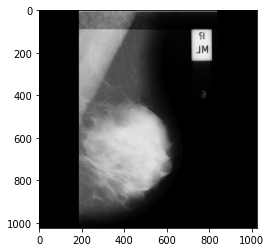

In [ ]:
img = cv2.imread(img_name[1])
plt.imshow(img)

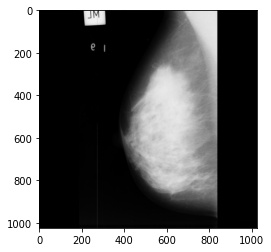

In [ ]:
img = cv2.imread(img_name[2])
plt.imshow(img)

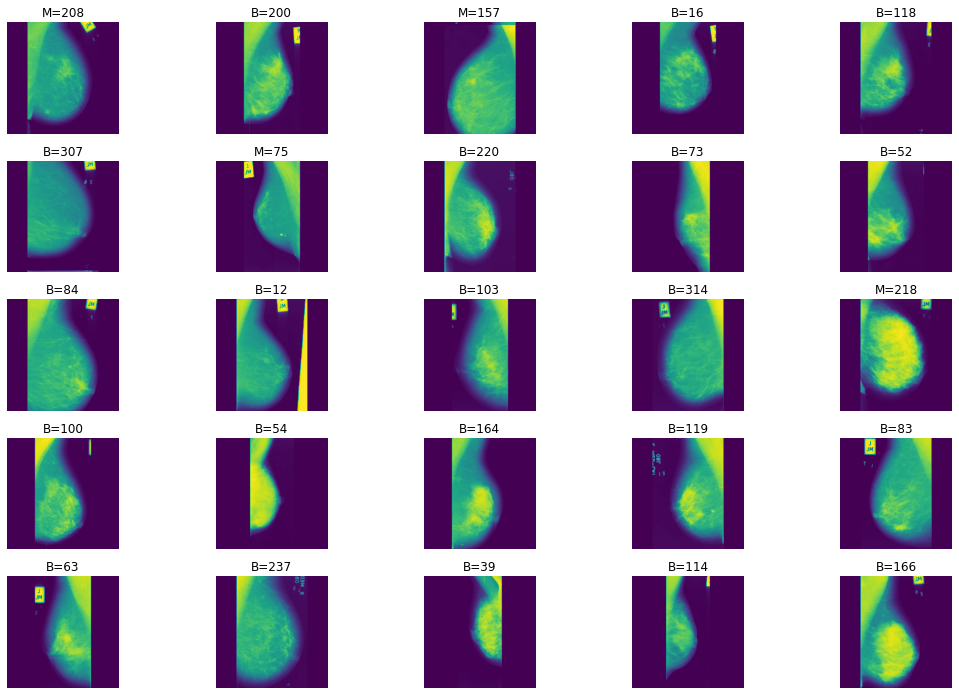

In [ ]:
def view_25_random_image():
    fig = plt.figure(figsize = (15, 10))
    for i in range(25):
        rand = random.randint(0,len(label)-1)
        ax = plt.subplot(5, 5, i+1)
    
        img = cv2.imread(img_name[rand], 0)
        img = cv2.resize(img, (256,256))
        if label[rand] == 1:
            plt.title("B={}".format(rand))
        else:
            plt.title("M={}".format(rand))
        plt.tight_layout()
        plt.axis('off')
        plt.imshow(img)
    fig.savefig('random_25_image_fig.png')

random_images = view_25_random_image()

Rotation is a three-step operation:

First, you need to get the center of rotation. This typically is the center of the image you are trying to rotate.
Next, create the 2D-rotation matrix. OpenCV provides the getRotationMatrix2D() function that we discussed above.
Finally, apply the affine transformation to the image, using the rotation matrix you created in the previous step. The warpAffine() function in OpenCV does the job.
getRotationMatrix2D(center, angle, scale)

center: the center of rotation for the input image
angle: the angle of rotation in degrees
scale: an isotropic scale factor which scales the image up or down according to the value provided
The warpAffine() function applies an affine transformation to the image. After applying affine transformation, all the parallel lines in the original image will remain parallel in the output image as well.

warpAffine(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]])

src: the source mage
M: the transformation matrix
dsize: size of the output image
dst: the output image
flags: combination of interpolation methods such as INTER_LINEAR or INTER_NEAREST
borderMode: the pixel extrapolation method
borderValue: the value to be used in case of a constant border, has a default value of 0

In [ ]:
img_path = []
last_label = []
for i in range(len(img_name)):
    
    img = cv2.imread(img_name[i], 0)
    img = cv2.resize(img, (224,224))
    rows, cols= img.shape
    for angle in range(90):
            M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)    #Rotate 0 degree
            img_rotated = cv2.warpAffine(img, M, (224, 224))
            img_path.append(img_rotated)
            if label[i] == 1:
                last_label.append(1)
            else:
                last_label.append(0)

In [ ]:
last_label = np.array(last_label)
img_path = np.array(img_path)
print(last_label.shape)
print(img_path.shape)

(29700,)
(29700, 224, 224)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(img_path, last_label, test_size = 0.2, random_state = 42)

In [ ]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

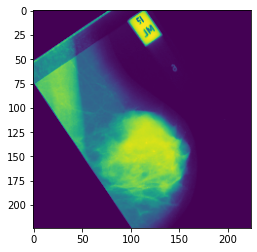

In [ ]:
plt.imshow(x_train[0])

In [ ]:
x_train.shape

(23760, 224, 224)

cnn architecture

In [ ]:
tpath='/content/drive/MyDrive/breast cancer detection/train'

In [ ]:
import cv2
import os

def load_images_from_folder(path):
    images = []
    for filename in os.listdir(len(path)-10000):
        img = cv2.imread(os.path.join(tpath,filename))
        if img is not None:
            images.append(img)
    return images


In [ ]:
ip='/content/drive/MyDrive/breast cancer detection/all-mias/mdb005.pgm'

In [ ]:
imag=np.resize(ip,(224,224,3))

In [ ]:
import tensorflow as tf
img = tf.expand_dims(imag,axis = 0)
img.shape.as_list()

[1, 224, 224, 3]

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPool2D, Flatten
from keras import optimizers
from keras import losses

def create_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(224, 224, 1)))
    model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
  
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    return model

In [ ]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 54, 54, 64)        0

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=2,restore_best_weights=True, verbose=1)

check_point_filepath = './'

model_check_point = ModelCheckpoint(filepath =check_point_filepath, monitor='val_loss', verbose=1, save_best_only=True,
                                    save_weights_only=False, mode='auto', save_freq='epoch')

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist = model.fit(x_train,
                 y_train,
                 validation_split=0.2,
                 epochs=50,
                 batch_size=64,
                 callbacks=[early_stop, model_check_point])

Epoch 1/50
297/297 [==============================] - ETA: 0s - loss: 1.3344 - accuracy: 0.8219
Epoch 1: val_loss improved from inf to 0.48180, saving model to ./


297/297 [==============================] - 85s 244ms/step - loss: 1.3344 - accuracy: 0.8219 - val_loss: 0.4818 - val_accuracy: 0.8268
Epoch 2/50
297/297 [==============================] - ETA: 0s - loss: 0.3888 - accuracy: 0.8496
Epoch 2: val_loss improved from 0.48180 to 0.36473, saving model to ./


297/297 [==============================] - 77s 260ms/step - loss: 0.3888 - accuracy: 0.8496 - val_loss: 0.3647 - val_accuracy: 0.8504
Epoch 3/50
297/297 [==============================] - ETA: 0s - loss: 0.3180 - accuracy: 0.8703
Epoch 3: val_loss improved from 0.36473 to 0.31509, saving model to ./


297/297 [==============================] - 73s 246ms/step - loss: 0.3180 - accuracy: 0.8703 - val_loss: 0.3151 - val_accuracy: 0.8706
Epoch 4/50
297/297 [==============================] - ETA: 0s - loss: 0.2530 - accuracy: 0.8966
Epoch 4: val_loss improved from 0.31509 to 0.25265, saving model to ./


297/297 [==============================] - 73s 245ms/step - loss: 0.2530 - accuracy: 0.8966 - val_loss: 0.2526 - val_accuracy: 0.8975
Epoch 5/50
297/297 [==============================] - ETA: 0s - loss: 0.2105 - accuracy: 0.9151
Epoch 5: val_loss improved from 0.25265 to 0.23723, saving model to ./


297/297 [==============================] - 73s 246ms/step - loss: 0.2105 - accuracy: 0.9151 - val_loss: 0.2372 - val_accuracy: 0.8979
Epoch 6/50
297/297 [==============================] - ETA: 0s - loss: 0.1696 - accuracy: 0.9324
Epoch 6: val_loss improved from 0.23723 to 0.17448, saving model to ./


297/297 [==============================] - 73s 245ms/step - loss: 0.1696 - accuracy: 0.9324 - val_loss: 0.1745 - val_accuracy: 0.9392
Epoch 7/50
297/297 [==============================] - ETA: 0s - loss: 0.1475 - accuracy: 0.9395
Epoch 7: val_loss improved from 0.17448 to 0.15353, saving model to ./


297/297 [==============================] - 77s 258ms/step - loss: 0.1475 - accuracy: 0.9395 - val_loss: 0.1535 - val_accuracy: 0.9402
Epoch 8/50
297/297 [==============================] - ETA: 0s - loss: 0.1181 - accuracy: 0.9534
Epoch 8: val_loss improved from 0.15353 to 0.12919, saving model to ./


297/297 [==============================] - 73s 245ms/step - loss: 0.1181 - accuracy: 0.9534 - val_loss: 0.1292 - val_accuracy: 0.9569
Epoch 9/50
297/297 [==============================] - ETA: 0s - loss: 0.1010 - accuracy: 0.9609
Epoch 9: val_loss did not improve from 0.12919
297/297 [==============================] - 71s 240ms/step - loss: 0.1010 - accuracy: 0.9609 - val_loss: 0.1312 - val_accuracy: 0.9510
Epoch 10/50
297/297 [==============================] - ETA: 0s - loss: 0.0769 - accuracy: 0.9710
Epoch 10: val_loss improved from 0.12919 to 0.12281, saving model to ./


297/297 [==============================] - 72s 244ms/step - loss: 0.0769 - accuracy: 0.9710 - val_loss: 0.1228 - val_accuracy: 0.9615
Epoch 11/50
297/297 [==============================] - ETA: 0s - loss: 0.0758 - accuracy: 0.9727
Epoch 11: val_loss improved from 0.12281 to 0.11205, saving model to ./


297/297 [==============================] - 73s 246ms/step - loss: 0.0758 - accuracy: 0.9727 - val_loss: 0.1120 - val_accuracy: 0.9556
Epoch 12/50
297/297 [==============================] - ETA: 0s - loss: 0.0737 - accuracy: 0.9735
Epoch 12: val_loss did not improve from 0.11205
297/297 [==============================] - 71s 240ms/step - loss: 0.0737 - accuracy: 0.9735 - val_loss: 0.1153 - val_accuracy: 0.9680
Epoch 13/50
297/297 [==============================] - ETA: 0s - loss: 0.0814 - accuracy: 0.9704
Epoch 13: val_loss improved from 0.11205 to 0.10141, saving model to ./


297/297 [==============================] - 72s 243ms/step - loss: 0.0814 - accuracy: 0.9704 - val_loss: 0.1014 - val_accuracy: 0.9747
Epoch 14/50
297/297 [==============================] - ETA: 0s - loss: 0.0553 - accuracy: 0.9813
Epoch 14: val_loss did not improve from 0.10141
297/297 [==============================] - 71s 239ms/step - loss: 0.0553 - accuracy: 0.9813 - val_loss: 0.1152 - val_accuracy: 0.9676
Epoch 15/50
297/297 [==============================] - ETA: 0s - loss: 0.0428 - accuracy: 0.9851
Epoch 15: val_loss improved from 0.10141 to 0.08673, saving model to ./


297/297 [==============================] - 72s 243ms/step - loss: 0.0428 - accuracy: 0.9851 - val_loss: 0.0867 - val_accuracy: 0.9771
Epoch 16/50
297/297 [==============================] - ETA: 0s - loss: 0.0493 - accuracy: 0.9843
Epoch 16: val_loss improved from 0.08673 to 0.07321, saving model to ./


297/297 [==============================] - 72s 243ms/step - loss: 0.0493 - accuracy: 0.9843 - val_loss: 0.0732 - val_accuracy: 0.9802
Epoch 17/50
297/297 [==============================] - ETA: 0s - loss: 0.0367 - accuracy: 0.9890
Epoch 17: val_loss improved from 0.07321 to 0.06730, saving model to ./


297/297 [==============================] - 72s 244ms/step - loss: 0.0367 - accuracy: 0.9890 - val_loss: 0.0673 - val_accuracy: 0.9817
Epoch 18/50
297/297 [==============================] - ETA: 0s - loss: 0.0323 - accuracy: 0.9892
Epoch 18: val_loss improved from 0.06730 to 0.06010, saving model to ./


297/297 [==============================] - 72s 243ms/step - loss: 0.0323 - accuracy: 0.9892 - val_loss: 0.0601 - val_accuracy: 0.9851
Epoch 19/50
297/297 [==============================] - ETA: 0s - loss: 0.0428 - accuracy: 0.9864
Epoch 19: val_loss did not improve from 0.06010
297/297 [==============================] - 71s 239ms/step - loss: 0.0428 - accuracy: 0.9864 - val_loss: 0.0796 - val_accuracy: 0.9813
Epoch 20/50
297/297 [==============================] - ETA: 0s - loss: 0.0415 - accuracy: 0.9861Restoring model weights from the end of the best epoch: 18.

Epoch 20: val_loss did not improve from 0.06010
297/297 [==============================] - 71s 239ms/step - loss: 0.0415 - accuracy: 0.9861 - val_loss: 0.0758 - val_accuracy: 0.9809
Epoch 20: early stopping


In [ ]:
loss_value , accuracy = model.evaluate(x_test, y_test)

print('Test_loss_value = ' +str(loss_value))
print('test_accuracy = ' + str(accuracy))

print(model.predict(x_test))

186/186 [==============================] - 9s 47ms/step - loss: 0.0803 - accuracy: 0.9813
Test_loss_value = 0.08032730221748352
test_accuracy = 0.9813131093978882
186/186 [==============================] - 8s 44ms/step
[[1.        ]
 [1.        ]
 [1.        ]
 ...
 [0.99999976]
 [0.99999356]
 [1.        ]]


In [ ]:
def Visualize_Result(acc,val_acc,loss, val_loss):
    fig, (ax1, ax2) = plt.subplots(nrows = 1,
                                   ncols = 2,
                                   figsize = (15,6),
                                   sharex =True)

    plot1 = ax1.plot(range(0, len(acc)),
                     acc,
                     label = 'accuracy')

    plot2 = ax1.plot(range(0, len(val_acc)),
                     val_acc,
                     label = 'val_accuracy')

    ax1.set(title = 'Accuracy And Val Accuracy progress',
            xlabel = 'epoch',
            ylabel = 'accuracy/ validation accuracy')

    ax1.legend()

    plot3 = ax2.plot(range(0, len(loss)),
                     loss,
                     label = 'loss')
    
    plot4 = ax2.plot(range(0, len(val_loss)),
                     val_loss,
                     label = 'val_loss')
    
    ax2.set(title = 'Loss And Val loss progress',
            xlabel = 'epoch',
            ylabel = 'loss/ validation loss')

    ax2.legend()

    fig.suptitle('Result Of Model', fontsize = 20, fontweight = 'bold')
    fig.savefig('Accuracy_Loss_figure.png')
    plt.tight_layout()
    plt.show()


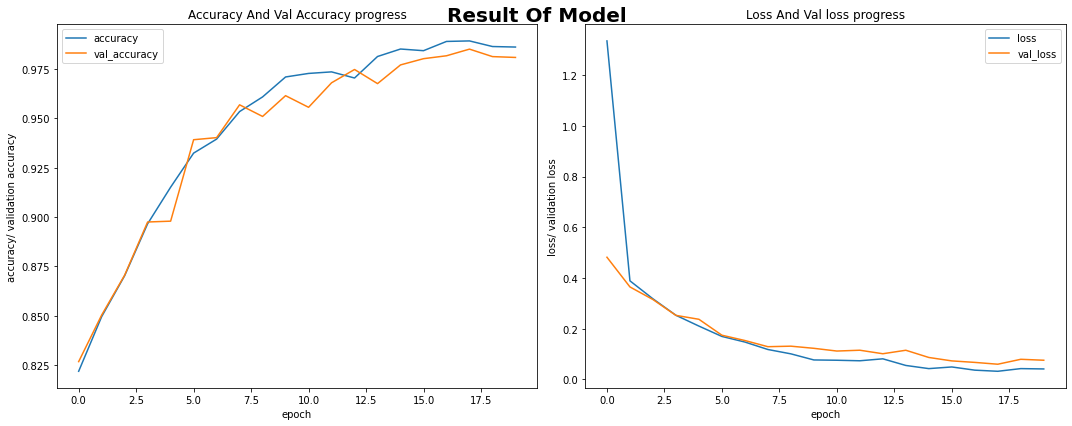

In [ ]:

visualize_result = Visualize_Result(hist.history['accuracy'],hist.history['val_accuracy'], hist.history['loss'], hist.history['val_loss'])


In [ ]:
#lenet

In [ ]:
model_1 = keras.Sequential()

model_1.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(224,224,1)))

model_1.add(layers.AveragePooling2D())
model_1.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model_1.add(layers.AveragePooling2D())

model_1.add(layers.Flatten())
model_1.add(layers.Dense(units=120, activation='relu'))
model_1.add(layers.Dense(units=84, activation='relu'))
model_1.add(layers.Dense(units=1, activation = 'softmax'))


In [ ]:
model_1.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
hist_1 = model_1.fit(x_train,
                 y_train,
                 validation_split=0.2,
                 epochs=50,
                 batch_size=64,
                 callbacks=[early_stop, model_check_point])

Epoch 1/50
295/297 [============================>.] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.8379
Epoch 1: val_loss improved from 0.06010 to 0.00000, saving model to ./


297/297 [==============================] - 10s 29ms/step - loss: 0.0000e+00 - accuracy: 0.8383 - val_loss: 0.0000e+00 - val_accuracy: 0.8323
Epoch 2/50
297/297 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.8383
Epoch 2: val_loss did not improve from 0.00000
297/297 [==============================] - 8s 27ms/step - loss: 0.0000e+00 - accuracy: 0.8383 - val_loss: 0.0000e+00 - val_accuracy: 0.8323
Epoch 3/50
295/297 [============================>.] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.8383Restoring model weights from the end of the best epoch: 1.

Epoch 3: val_loss did not improve from 0.00000
297/297 [==============================] - 8s 28ms/step - loss: 0.0000e+00 - accuracy: 0.8383 - val_loss: 0.0000e+00 - val_accuracy: 0.8323
Epoch 3: early stopping


In [ ]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 6)       60        
                                                                 
 average_pooling2d (AverageP  (None, 111, 111, 6)      0         
 ooling2D)                                                       
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 average_pooling2d_1 (Averag  (None, 54, 54, 16)       0         
 ePooling2D)                                                     
                                                                 
 flatten_1 (Flatten)         (None, 46656)             0         
                                                                 
 dense_2 (Dense)             (None, 120)              

In [ ]:
loss_value_1 , accuracy_1 = model_1.evaluate(x_test, y_test)

print('Test_loss_value = ' +str(loss_value_1))
print('test_accuracy = ' + str(accuracy_1))

print(model_1.predict(x_test))

186/186 [==============================] - 1s 7ms/step - loss: 0.0000e+00 - accuracy: 0.8333
Test_loss_value = 0.0
test_accuracy = 0.8333333134651184
186/186 [==============================] - 1s 4ms/step
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


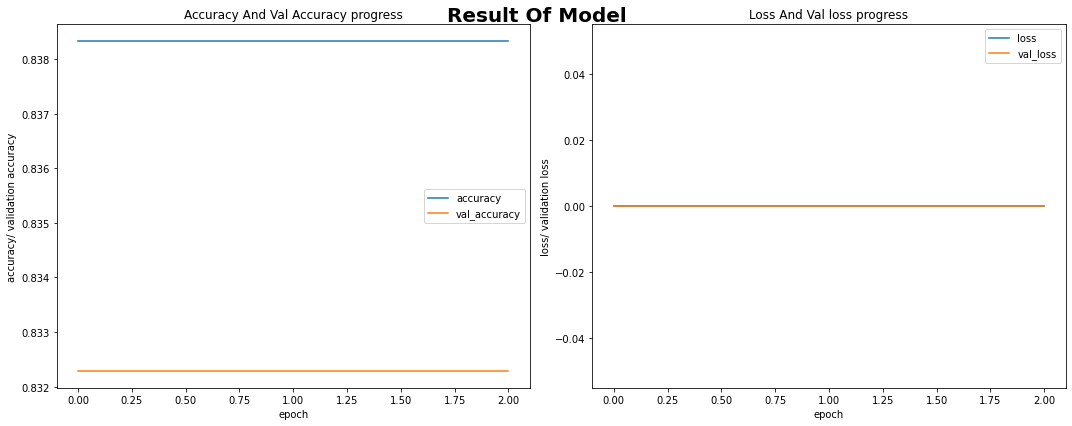

In [ ]:
visualize_result = Visualize_Result(hist_1.history['accuracy'],hist_1.history['val_accuracy'], hist_1.history['loss'], hist_1.history['val_loss'])

In [ ]:
model.save('/content/drive/MyDrive/breast cancer detection/cnnmodel.h5')

In [ ]:
import pickle

In [ ]:
pickle.dump(model, open('cnnmodel.h5','wb'))

In [ ]:
pic_model=pickle.load(open('cnnmodel.h5','rb'))

alexnet

In [ ]:
model_2 = keras.Sequential()
model_2.add(layers.Conv2D(filters=32, kernel_size=(11, 11), 
                        strides=(4, 4), activation="relu", 
                        input_shape=(224, 224, 1)))


model_2.add(layers.MaxPool2D(pool_size=(3, 3), strides= (2, 2)))
model_2.add(layers.Conv2D(filters=256, kernel_size=(5, 5), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))

model_2.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
model_2.add(layers.Conv2D(filters=384, kernel_size=(3, 3), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))

model_2.add(layers.Conv2D(filters=384, kernel_size=(3, 3), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))

model_2.add(layers.Conv2D(filters=256, kernel_size=(3, 3), 
                        strides=(1, 1), activation="relu", 
                        padding="same"))

model_2.add(layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2)))

model_2.add(layers.Flatten())
model_2.add(layers.Dense(4096, activation="relu"))
model_2.add(layers.Dropout(0.5))
model_2.add(layers.Dense(1, activation="softmax"))




In [ ]:
model_2.compile(loss='sparse_categorical_crossentropy', 
              optimizer=keras.optimizers.Adam(), 
              metrics=['accuracy'],
              )

In [ ]:
hist_2 = model_2.fit(x_train,
                 y_train,
                 validation_split=0.2,
                 epochs=50,
                 batch_size=64,
                 callbacks=[early_stop, model_check_point])

Epoch 1/50
297/297 [==============================] - ETA: 0s - loss: nan - accuracy: 0.1641
Epoch 1: val_loss did not improve from 0.00000
297/297 [==============================] - 14s 42ms/step - loss: nan - accuracy: 0.1641 - val_loss: nan - val_accuracy: 0.1677
Epoch 2/50
297/297 [==============================] - ETA: 0s - loss: nan - accuracy: 0.1617Restoring model weights from the end of the best epoch: 1.

Epoch 2: val_loss did not improve from 0.00000
297/297 [==============================] - 12s 40ms/step - loss: nan - accuracy: 0.1617 - val_loss: nan - val_accuracy: 0.1677
Epoch 2: early stopping
